In [1]:
# !mkdir ./mmdetection/checkpoints
# !mim download mmdet --config yolox_tiny_8x8_300e_coco --dest ./mmdetection/checkpoints

In [2]:
# 

In [3]:
# !python tools/misc/print_config.py configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py > faster_rcnn_r50_fpn_1x_coco_pod.py

In [4]:
# make sure coco-dataset annotation correction
TRAIN_DATA_DIR = "./dataset/Object_Detection/coco/train"
TRAIN_ANNOTATION_FILE_DIR = (
    "./dataset/Object_Detection/coco/train/train_annotations.json"
)
# OUTPUT_TFRECORD_TRAIN = "./dataset/Object_Detection/coco_tfrecords/train"

VALID_DATA_DIR = "./dataset/Object_Detection/coco/valid"
VALID_ANNOTATION_FILE_DIR = (
    "./dataset/Object_Detection/coco/valid/valid_annotations.json"
)

TEST_DATA_DIR = "./dataset/Object_Detection/coco/test"
TEST_ANNOTATION_FILE_DIR = "./dataset/Object_Detection/coco/test/test_annotations.json"

In [18]:

!python ./mmdetection/tools/train.py ./mmdetection/faster_rcnn_r50_fpn_1x_coco_pod.py \
    --work-dir ./mmdetection/output/faster_rcnn_r50_fpn_1x \
    --resume \
    ;

05/14 12:42:04 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 524428037
    GCC: gcc (Ubuntu 12.3.0-9ubuntu2) 12.3.0
    PyTorch: 2.3.0
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUSE

In [1]:
!python ./mmdetection/tools/test.py  ./mmdetection/faster_rcnn_r50_fpn_1x_coco_pod.py \
    ./mmdetection/output/faster_rcnn_r50_fpn_1x/best_coco_bbox_mAP_epoch_10.pth \
    --work-dir ./mmdetection/output/faster_rcnn_r50_fpn_1x \
    ;

05/14 12:24:57 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1455377553
    GCC: gcc (Ubuntu 12.3.0-9ubuntu2) 12.3.0
    PyTorch: 2.3.0
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUS

In [2]:
import json
import pandas

train_log = []
valid_log = []
test_log = []


with open( "./mmdetection/output/faster_rcnn_r50_fpn_1x/20240511_042622/vis_data/scalars.json", "r", ) as train_log_raw:
    for line in train_log_raw.readlines():
        # print(line)
        raw_set = json.loads(line)
        if "base_lr" in raw_set and "lr" in raw_set:
            train_log.append(raw_set)
        elif "coco/bbox_mAP" in raw_set:
            valid_log.append(raw_set)

In [3]:
with open(
    "./mmdetection/output/yolox_nano/20240514_113825/20240514_113825.json", "r"
) as test_log_raw:
    test_log.append(json.loads(test_log_raw.readline()))

In [4]:
train_log_ds = pandas.DataFrame(train_log)
valid_log_ds = pandas.DataFrame(valid_log)
test_log_ds = pandas.DataFrame(test_log)

In [6]:
print(train_log_ds.info(5))
# print(train_log_ds.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   base_lr        495 non-null    float64
 1   lr             495 non-null    float64
 2   data_time      495 non-null    float64
 3   loss           495 non-null    float64
 4   loss_rpn_cls   495 non-null    float64
 5   loss_rpn_bbox  495 non-null    float64
 6   loss_cls       495 non-null    float64
 7   acc            495 non-null    float64
 8   loss_bbox      495 non-null    float64
 9   time           495 non-null    float64
 10  epoch          495 non-null    int64  
 11  iter           495 non-null    int64  
 12  step           495 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 50.4 KB
None


In [7]:
print(valid_log_ds.info(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coco/bbox_mAP     1 non-null      float64
 1   coco/bbox_mAP_50  1 non-null      float64
 2   coco/bbox_mAP_75  1 non-null      float64
 3   coco/bbox_mAP_s   1 non-null      float64
 4   coco/bbox_mAP_m   1 non-null      float64
 5   coco/bbox_mAP_l   1 non-null      float64
 6   data_time         1 non-null      float64
 7   time              1 non-null      float64
 8   step              1 non-null      int64  
dtypes: float64(8), int64(1)
memory usage: 204.0 bytes
None


In [14]:
def plot_loss_graph(df):
    """
    Plots the loss and validation loss over epochs.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the loss and validation loss values.

    Returns:
    None
    """

    import pandas as pd
    import matplotlib.pyplot as plt

    plt.plot(df["iter"], df["loss"], label="loss")
    plt.plot(df["iter"], df["loss_cls"], label="loss_cls")
    plt.plot(df["iter"], df["loss_bbox"], label="loss_bbox")
    plt.plot(df["iter"], df["loss_obj"], label="loss_obj") if "loss_obj" in df else ()
    plt.plot(df["iter"], df["loss_l1"], label="loss_l1") if "loss_l1" in df else ()

    plt.legend()
    plt.show()

In [9]:
train_log_ds.tail(1)

,base_lr,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,time,epoch,iter,step
494,8.000000e-07,8.000000e-07,0.569877,0.733669,0.017342,0.072247,0.257335,88.15918,0.386745,51.436276,20,2532,2532


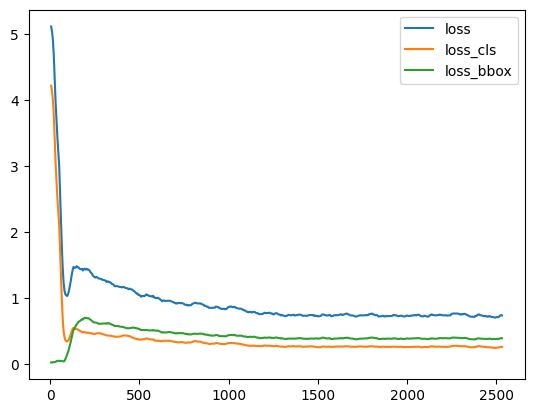

In [15]:
plot_loss_graph(train_log_ds)

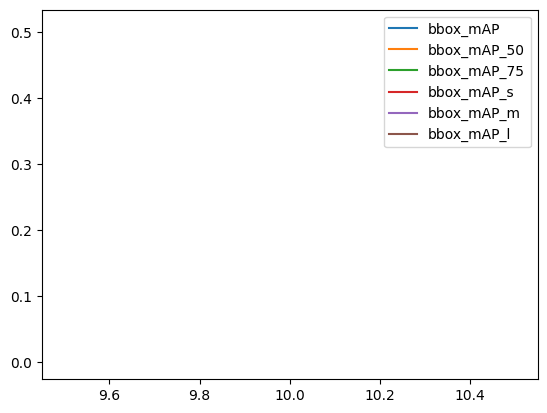

In [16]:
def plot_acc_graph(df):
    """
    Plots the accuracy graph using the given dataframe.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the accuracy values.

    Returns:
    None
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    plt.plot(df["step"], df["coco/bbox_mAP"], label="bbox_mAP")
    plt.plot(df["step"], df["coco/bbox_mAP_50"], label="bbox_mAP_50")
    plt.plot(df["step"], df["coco/bbox_mAP_75"], label="bbox_mAP_75")
    plt.plot(df["step"], df["coco/bbox_mAP_s"], label="bbox_mAP_s")
    plt.plot(df["step"], df["coco/bbox_mAP_m"], label="bbox_mAP_m")
    plt.plot(df["step"], df["coco/bbox_mAP_l"], label="bbox_mAP_l")

    plt.legend()
    plt.show()


plot_acc_graph(valid_log_ds)